(514, 514, 3)


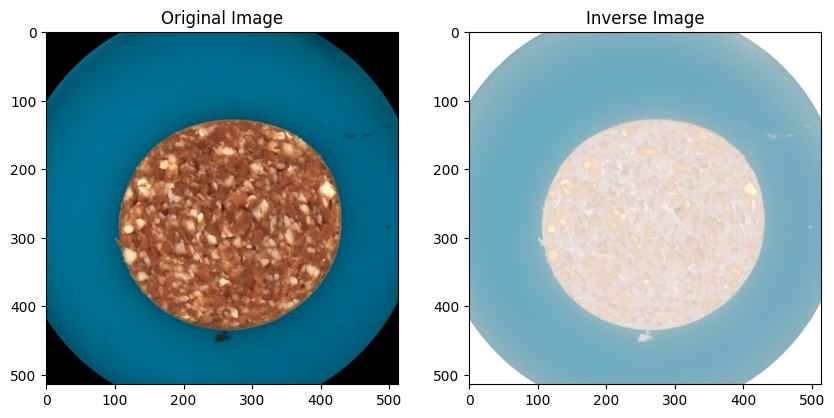

In [36]:
import pywt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Load image
img = mpimg.imread('modelling/Salami_Project/color_day01.png')
print(img.shape)
# Wavelet transform of image, and plot approximation and details
coeffs = pywt.dwt2(img, 'haar')
cA, (cH, cV, cD) = coeffs

inverse = pywt.idwt2(coeffs, 'haar')
inverse = exposure.rescale_intensity(inverse, in_range='image', out_range=(0.0, 1.0))
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(inverse, cmap='gray')
ax[1].set_title('Inverse Image')
plt.show()


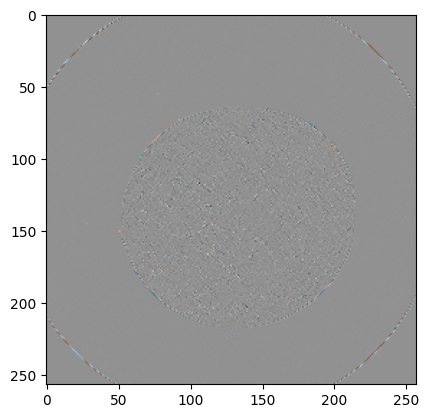

In [37]:
#try 2
from skimage import exposure

# Apply the wavelet transform to each color channel
coeffs_r = pywt.dwt2(img[:, :, 0], 'haar')
coeffs_g = pywt.dwt2(img[:, :, 1], 'haar')
coeffs_b = pywt.dwt2(img[:, :, 2], 'haar')

# Unpack the coefficients
cA_r, (cH_r, cV_r, cD_r) = coeffs_r
cA_g, (cH_g, cV_g, cD_g) = coeffs_g
cA_b, (cH_b, cV_b, cD_b) = coeffs_b

# Stack the detail coefficients to create a 3-channel image
cD = np.dstack((cD_r, cD_g, cD_b))

# Rescale the values to the range 0-1
cD_rescaled = exposure.rescale_intensity(cD, in_range='image', out_range=(0.0, 1.0))

# Plot the rescaled detail coefficients
plt.imshow(cD_rescaled)
plt.show()

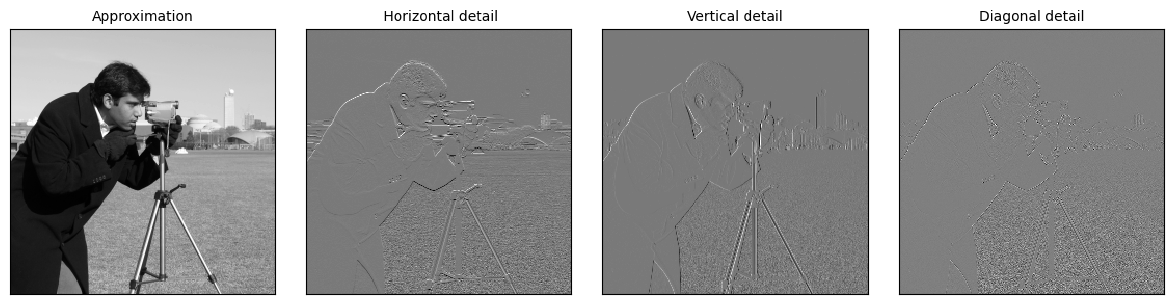

In [31]:
import matplotlib.pyplot as plt
import numpy as np

import pywt
import pywt.data

# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()